In [27]:
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use(plt.style.available[0])

Automatically created module for IPython interactive environment


In [94]:
np.random.seed(1)  #生成随机数种子
# #############################################################################
# 获得样本数据
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# 在标签中增加噪音
y[::5] += 3 * (0.5 - np.random.rand(8))

print(X[:20])
print(y[:20])

[[5.71874087e-04]
 [9.14413867e-02]
 [1.36937966e-01]
 [1.95273916e-01]
 [4.25221057e-01]
 [4.61692974e-01]
 [4.91734169e-01]
 [7.01934693e-01]
 [7.33779454e-01]
 [8.49152098e-01]
 [9.31301057e-01]
 [9.90507445e-01]
 [1.02226125e+00]
 [1.51166286e+00]
 [1.56712089e+00]
 [1.57757816e+00]
 [1.72780364e+00]
 [1.98383737e+00]
 [2.08511002e+00]
 [2.08652401e+00]]
[-1.46601139  0.09131401  0.13651039  0.19403525  0.41252216 -0.2990325
  0.47215529  0.64569622  0.66968122  0.75072053  1.4610651   0.8363043
  0.8532893   0.99825213  0.99999325  0.13213902  0.98769965  0.9159044
  0.87063055  0.86993408]


In [95]:
# #############################################################################
# 拟合回归模型
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

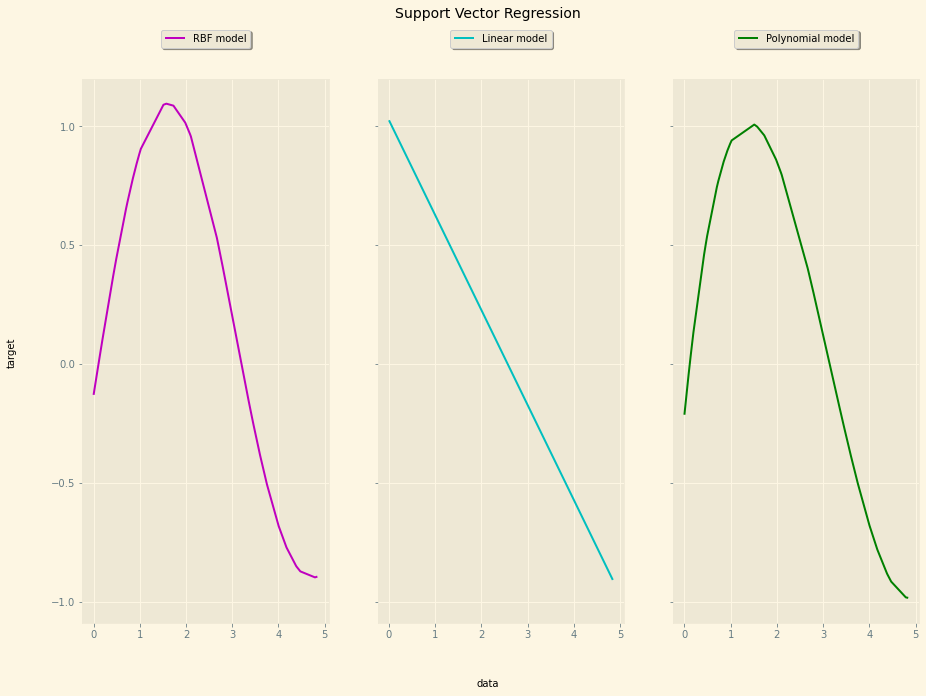

In [96]:
# #############################################################################
# 查看结果
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))  #绘制曲线
    # axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
    #                  edgecolor=model_color[ix], s=50,
    #                  label='{} support vectors'.format(kernel_label[ix]))  #绘制支持向量

    # axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
    #                  y[np.setdiff1d(np.arange(len(X)), svr.support_)],
    #                  facecolor="none", edgecolor="k", s=50,
    #                  label='other training data')  #绘制样本点
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)  #标题

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [97]:
print('dual_coef_ 决策函数中支持向量的系数 \n', svr_rbf.dual_coef_)  #决策函数中支持向量的系数
print('support_ 支持向量的下标 \n',svr_rbf.support_)
print('support_vectors_ 形如(n_SV, n_features)的数组 支持向量 \n',svr_rbf.support_vectors_)
print('intercept_ 决策函数中的常量 \n',svr_rbf.intercept_)

dual_coef_ 决策函数中支持向量的系数 
 [[-100.          100.           47.05426338 -100.          100.
  -100.          -32.50328186  100.           51.38489159 -100.
   100.          -63.39557382   -2.5402993 ]]
support_ 支持向量的下标 
 [ 0  1  2  5 10 15 17 20 25 30 35 37 38]
support_vectors_ 形如(n_SV, n_features)的数组 支持向量 
 [[5.71874087e-04]
 [9.14413867e-02]
 [1.36937966e-01]
 [4.61692974e-01]
 [9.31301057e-01]
 [1.57757816e+00]
 [1.98383737e+00]
 [2.09597257e+00]
 [3.35233755e+00]
 [3.60162247e+00]
 [4.39058718e+00]
 [4.47303332e+00]
 [4.78944765e+00]]
intercept_ 决策函数中的常量 
 [-0.45632046]


In [98]:
x_pred = svr_rbf.predict(X)









array([-0.1293769 , -0.01821813,  0.03692242,  0.1069253 ,  0.37153048,
        0.41131832,  0.44354633,  0.65312539,  0.68213368,  0.78033968,
        0.84320966,  0.88462907,  0.90544626,  1.09104856,  1.0951652 ,
        1.09554686,  1.0872792 ,  1.01554991,  0.96828791,  0.96755681,
        0.96262232,  0.95754008,  0.53228391,  0.50571305,  0.40986292,
       -0.15246648, -0.22340493, -0.22947443, -0.25476251, -0.2568449 ,
       -0.38319914, -0.50621212, -0.68124462, -0.77117259, -0.84934047,
       -0.85178153, -0.85181647, -0.87189734, -0.89708799, -0.89372596])